### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import cufflinks as cf
cf.go_offline()
%matplotlib inline

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# First checking number of rows and columns, the dimension, and summary of the data

In [4]:
data.index

RangeIndex(start=0, stop=12684, step=1)

In [5]:
data.columns 

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
data.shape

(12684, 26)

Summary:From the above information, the dataset has 12684 entries and 26 columns. Each entries has a 1 step.

# Geting some descriptive statistics of the dataset

In [8]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function only provided statitcal information of columns of the dataset that has only numerical value.

Note from descriptive statistics:

From the above statistics we have seen that min,max,mean, std, and quartils of the dataset that has a numeric value column.


# 2. Investigate the dataset for missing or problematic data.

Suggestion: Befor we start to add and delete the missing data, it is good idea to have a copy of the original data

In [9]:
# this is the copy of the original dataset 
data_copy=data.copy()

In [10]:
# Now you can add and drop the missing data
pd.options.display.max_columns=None
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


In [11]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

# To check the missing values from the dataset, isnull() function is a good tool to perform it

In [12]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

summary: The results from the above .isnull() function, the columns car,Bar,coffeehouse,carryAway,RestaurantLessThan20,and
          Restaurant20To50 have a missing values. 

In [13]:
# get percentage of missing value
data.isnull().sum()/data.shape[0]*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

Summary: Car column has more 99% missing values and Bar,coffeehouse,carryAway,RestaurantLessThan20,and Restaurant20To50 have under 2% missing values.

# Since most columns has no missing value, the ratio is 0.00. Lets grap only columns that has a missing value, greater than 0

In [14]:
# All missing values greater than 0
for columns in data.columns:
    if data[columns].isnull().sum()>0:
        print(columns,':missing data in percentage is {values_gt0:.2f}%'.format(values_gt0=data[columns].isnull().sum()/data[columns].shape[0]*100))

car :missing data in percentage is 99.15%
Bar :missing data in percentage is 0.84%
CoffeeHouse :missing data in percentage is 1.71%
CarryAway :missing data in percentage is 1.19%
RestaurantLessThan20 :missing data in percentage is 1.02%
Restaurant20To50 :missing data in percentage is 1.49%


summary:
From the above result car column has huge number of value missing. It has more that 99% missing values.
 So, since this column has a huge number of missing values, it is quite had to fill it and give to machine. probablly,the result will affect by this decision. The good idea is its better to drop the column.
 
 The other columns such as Bar,coffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50 each column has below 2% missing values. Better to keep and fill them. But, important question think what to fill.  

3. # Decide what to do about your missing data -- drop, replace, other...

In [15]:
# graping datasets than contains onlt either 'never','less1','1~3','4~8', or 'gt8' for bar column
Bar_never=data.loc[data['Bar'].str.contains('never',na=False)]
Bar_less1=data.loc[data['Bar'].str.contains('less1',na=False)]
Bar_b13=data.loc[data['Bar'].str.contains('1~3',na=False)]
Bar_b48=data.loc[data['Bar'].str.contains('4~8',na=False)]
Bar_gt8=data.loc[data['Bar'].str.contains('gt8',na=False)]

In [16]:
# lets start to fill the Bar 
# lets see first the unique of the data
print('Number of unique of a Bar:\n',data['Bar'].unique()) 
print('\n')
print('Total values for each unique: \n',data['Bar'].value_counts())
print('\n')
print('the number of missing data of a Bar:\n', data['Bar'].isnull().sum())

#this process can go to all others that has a missing value

Number of unique of a Bar:
 ['never' 'less1' '1~3' 'gt8' nan '4~8']


Total values for each unique: 
 never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64


the number of missing data of a Bar:
 107


In [17]:
#Look at the Bar data set what to fill the missing value. 
#since in the of case "Bar", 'never' has the highest value, I will fill the missing with 'never'
data['Bar'].fillna(data['Bar'].value_counts().idxmax(), inplace=True)

In [18]:
# for the CoffeeHouse,CarryAway,RestaurantLessThan20, and Restaurant20To50 
data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().idxmax(), inplace=True) 
data['CarryAway'].fillna(data['CarryAway'].value_counts().idxmax(), inplace=True) 
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().idxmax(), inplace=True) 
data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().idxmax(), inplace=True) 

In [19]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [20]:
# Last the Car column, 

# The Car column has a huge number of missing values. Which 12576 or 99.15% values are missing. I highly sujjested that to drop
#it than to fill it.

data.drop('car', axis=1, inplace=True)

In [21]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Finally, we have a clean dataset after I applied a fillna and drop function, to fill if the missing values of the column are
small pecentage and drop if large percentage

# Extra exploratory data analysis and Data Visualization

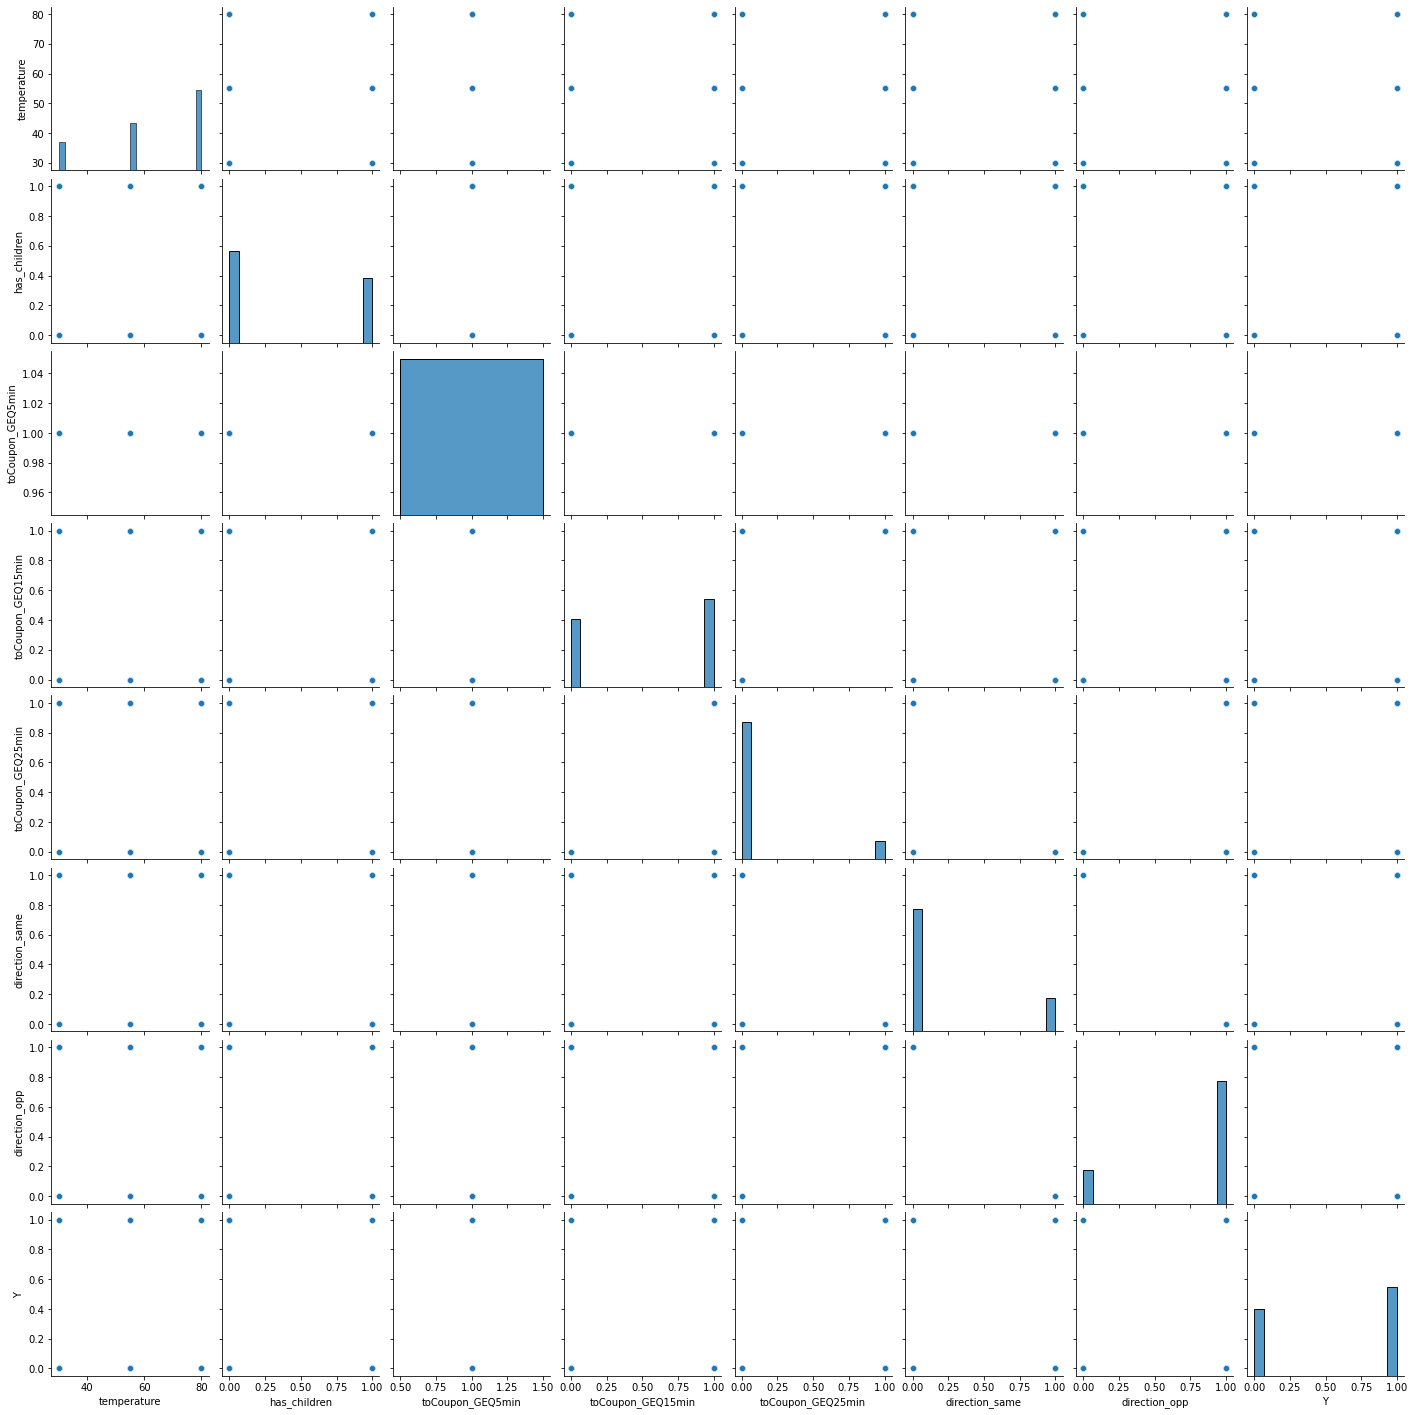

In [78]:
sns.pairplot(data)

The pairplot gives us some dataset relationship that has only a numeric value.

<AxesSubplot:>

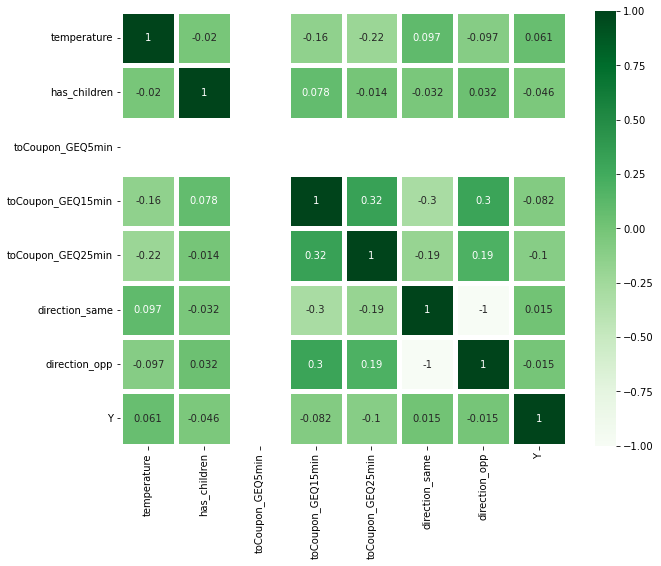

In [94]:
fig =plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='Greens', linewidths=5, linecolor='white')
#sns.color_palette("flare", as_cmap=True)

From the seaborn heatmap, there is no strong relationship between the columns that have a numeric values. 

In [98]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

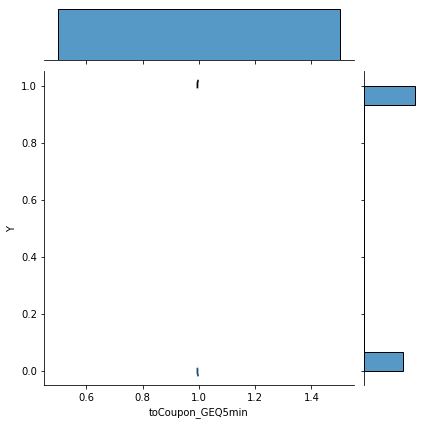

In [102]:
sns.jointplot(data=data, x ="toCoupon_GEQ5min",y='Y', kind='hex')

In [108]:
px.scatter(data_frame=data, x ='temperature', y= 'toCoupon_GEQ5min', marginal_x='histogram', marginal_y='histogram')

# Count each unique of the column using 

value_counts() function 

Lets discore what are the total number of coupons are accepted or 
             what are the total number of coupons are rejected from the total amount provided from Amazon

In [22]:
# to know the total number of customers has accepted or rejected

data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

C:\Users\kafub\AppData\Local\Temp/ipykernel_19960/928210072.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



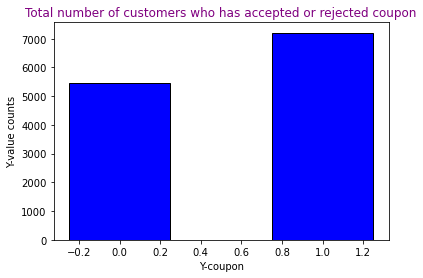

In [23]:
# lets see this on graph
fig=plt.figure()
plt.bar(data['Y'].unique(),data['Y'].value_counts(), color='blue', width=0.5, edgecolor='black')
plt.xlabel('Y-coupon')
plt.ylabel('Y-value counts')
plt.title('Total number of customers who has accepted or rejected coupon', color='purple')
fig.show()

In [24]:
#Calulating tota numbers of customers whop has accepted and rejected in percentage
print('The total percentage of customers who accepted the coupn is %.2f%%' %(data['Y'].value_counts()[1]/data.shape[0]*100))
print('The total percentage of customers who rejected the coupn is %.2f%%' %(data['Y'].value_counts()[0]/data.shape[0]*100))


The total percentage of customers who accepted the coupn is 56.84%
The total percentage of customers who rejected the coupn is 43.16%


So, from the above bar graph and total percentage ratio calculation, I have concluded the from the total number of coupons amazon had sent, more 56% were accepted by the customers and under 43% are rejected. 

Conclusion: Amazon still have known that a higher numbers of coupons had accepted

In [25]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


4. # What proportion of the total observations chose to accept the coupon? 



In [26]:
data_only_acceted_coupon=data.loc[data['Y']==1]

In [27]:
print(data_only_acceted_coupon.shape)
print('\n')
# from the total observations, the proportion of accepted coupons 
print(data['Y'].value_counts()[1]/data.shape[0])
print('\n')
# Total percentage accepted coupons
print(f'The total percentage of customers who accepted the coupn is %.2f%%' %(data['Y'].value_counts()[1]/data.shape[0]*100))

(7210, 25)


0.5684326710816777


The total percentage of customers who accepted the coupn is 56.84%


Summary: from the total survey, 7210 coupons were accpted. This is 56.84% from the total coupons are accepted.

5. # Use a bar plot to visualize the `coupon` column.

In [28]:
#showing total number of coupons provided by amazon
print('Total number of coupons provided by Amazon are:', data['coupon'].nunique())
print('\n')
print('list of all coupons \n',data['coupon'].unique())

Total number of coupons provided by Amazon are: 5


list of all coupons 
 ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [29]:
#total values of each coupons
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [30]:
#a plotly for each coupons 
arranged_coupons=['Coffee House','Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
px.bar(x=arranged_coupons, y=data['coupon'].value_counts(),title='bar plot to visualize the coupon column')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

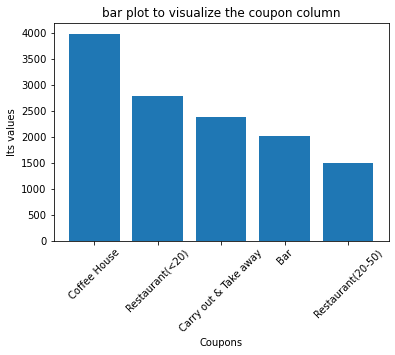

In [31]:
#matplotlib of each coupons
arranged_coupons=['Coffee House','Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
plt.bar(arranged_coupons,data['coupon'].value_counts())
plt.xlabel('Coupons')
plt.ylabel('Its values')
plt.title('bar plot to visualize the coupon column')
plt.xticks(rotation=45)

In [32]:
#percentage of acceptance for each coupons 
print('The percentage of coupons accepted from coffee house is %.2f%%' %(data['coupon'].value_counts()[0]/data.shape[0]*100),)
print('The percentage of coupons accepted from Restaurant(<20) is %.2f%%' %(data['coupon'].value_counts()[1]/data.shape[0]*100),)
print('The percentage of coupons accepted from Carry out & Take away is %.2f%%' %(data['coupon'].value_counts()[2]/data.shape[0]*100),)
print('The percentage of coupons accepted from bar is %.2f%%' %(data['coupon'].value_counts()[3]/data.shape[0]*100),)
print('The percentage coupons accepted from Restaurant(20-50) is %.2f%%' %(data['coupon'].value_counts()[4]/data.shape[0]*100))

The percentage of coupons accepted from coffee house is 31.50%
The percentage of coupons accepted from Restaurant(<20) is 21.96%
The percentage of coupons accepted from Carry out & Take away is 18.87%
The percentage of coupons accepted from bar is 15.90%
The percentage coupons accepted from Restaurant(20-50) is 11.76%


Summary: 

From the given survey data, the coffee house get higher number of coupon acceptance compare to the others, 
with 31.50% acceptance and Restaurant(20-50) get low number of coupon acceptance.

So, amazon can aware that most number of customers love coupons from the coffee house. It is good to send more a coffee house coupon than the others.

6. # Use a histogram to visualize the temperature column.

In [33]:
#number of uniques and its corresponding values for the temeperature column
data['temperature'].unique()
data['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

Text(0.5, 1.0, 'Temperature Histogram')

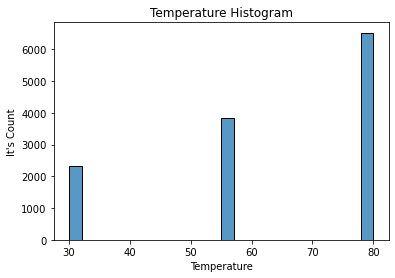

In [34]:
#a seaborn of temperature column
sns.histplot(data=data, x ='temperature')
plt.xlabel('Temperature')
plt.ylabel("It's Count")
plt.title('Temperature Histogram')

In [35]:
data[data['temperature']==80]['Y'].value_counts()
data[data['temperature']==80]['Y'].value_counts()/data['temperature'].value_counts()[80]*100

1    60.033701
0    39.966299
Name: Y, dtype: float64

In [36]:
data[data['temperature']==55]['Y'].value_counts()
data[data['temperature']==55]['Y'].value_counts()/data['temperature'].value_counts()[55]*100

1    53.671875
0    46.328125
Name: Y, dtype: float64

Summary: From the total coupon have sent at 55 temperature, more 53 percent have accepted and rest rejected

In [37]:
data[data['temperature']==30]['Y'].value_counts()
data[data['temperature']==30]['Y'].value_counts()/data['temperature'].value_counts()[30]*100

1    53.108808
0    46.891192
Name: Y, dtype: float64

Summary: From the total coupon have sent at30 temperature, more 53 percent have accepted and rest rejected

# Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

# 1. Create a new `DataFrame` that contains just the bar coupons.

In [38]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5807,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,31,Married partner,1,Bachelors degree,Architecture & Engineering,$87500 - $99999,less1,less1,4~8,less1,less1,1,0,0,0,1,0
5239,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),2h,Female,26,Unmarried partner,0,Graduate degree (Masters or Doctorate),Legal,$37500 - $49999,less1,less1,1~3,less1,never,1,1,0,0,1,0
3827,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,50plus,Married partner,1,Associates degree,Arts Design Entertainment Sports & Media,$25000 - $37499,never,never,less1,1~3,never,1,1,0,0,1,0
6316,Home,Alone,Sunny,80,10PM,Bar,1d,Female,31,Married partner,1,Graduate degree (Masters or Doctorate),Computer & Mathematical,$62500 - $74999,less1,4~8,4~8,1~3,never,1,1,0,1,0,0
3599,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,41,Married partner,0,Graduate degree (Masters or Doctorate),Management,$100000 or More,less1,4~8,gt8,gt8,1~3,1,0,0,1,0,1
10890,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,below21,Unmarried partner,0,High School Graduate,Student,Less than $12500,never,4~8,1~3,4~8,less1,1,1,0,0,1,0
321,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,41,Married partner,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$50000 - $62499,never,1~3,1~3,1~3,less1,1,0,0,0,1,1
12401,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,less1,less1,1~3,1~3,1~3,1,1,0,0,1,1
755,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,50plus,Married partner,0,Some college - no degree,Healthcare Support,$25000 - $37499,1~3,1~3,4~8,4~8,1~3,1,1,0,0,1,1
3229,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,31,Single,0,High School Graduate,Healthcare Support,$25000 - $37499,never,1~3,1~3,1~3,1~3,1,0,0,0,1,1


In [39]:
# graping coupon uniques
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [40]:
# graping all rows that contains "Bar" by using .str.contains function
bar_coupon=data.loc[data['coupon'].str.contains('Bar',na=False)]
bar_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


In [41]:
# Total bar coupons sent to the drivers from the entire survey given
bar_coupon.shape

(2017, 25)

In [42]:
# accepted bar coupon
bar_coupon.loc[bar_coupon['Y']==1].shape

(827, 25)

# 2. What proportion of bar coupons were accepted?


In [43]:
#creating a finction that calculate the ratio of bar coupons to the total bar coupon offers
def proportion_bar_coupon(data1,data2):
    
    return data2.shape[0]/data1.shape[0]

In [44]:
proportion_bar_coupon(bar_coupon,bar_coupon.loc[bar_coupon['Y']==1])

0.41001487357461575

Summary: 0.41 fron the total survey of a Bar coupon where accepted. We conculed that more 59% of the bar coupons were rejected. 

# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [45]:
# graping bar uniques
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [46]:
#bar total number of rows and columns
data['Bar'].shape

(12684,)

In [47]:
#counting a value for each uniques of bar coupons
data['Bar'].value_counts()

never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [48]:
#creating a list that contains drivers went to the bar 3 or fewer times a month and who went more repectively
driver_go_bar_lthan3_list=['never', 'less1', '1~3']
driver_go_bar_mthan4_list=['4~8','gt8']

In [49]:
#use a query to get the darFrame of drivers went to the bar 3 or fewer times a month and who went more repectively
query_driver_go_bar_lthan3=bar_coupon.query('Bar in @driver_go_bar_lthan3_list')
query_driver_go_bar_mthan4=bar_coupon.query('Bar in @driver_go_bar_mthan4_list')

In [50]:
#total number of coupons accepted by those who went to bar less than 3 or fever
# and those who went to bar more times
print('Total number of bar coupons accepted by those who went to bar less than 3 or fever is: {}'.format(query_driver_go_bar_lthan3.loc[query_driver_go_bar_lthan3['Y']==1].shape[0]))
print('Total number of bar coupons accepted by those who went to bar more times is: {}'.format(query_driver_go_bar_mthan4.loc[query_driver_go_bar_mthan4['Y']==1].shape[0]))

Total number of bar coupons accepted by those who went to bar less than 3 or fever is: 674
Total number of bar coupons accepted by those who went to bar more times is: 153


In [51]:
#total number of coupons rejected by those who went to bar less than 3 or fever
# and those who went to bar more times
print('Total number of bar coupons rejected by those who went to bar less than 3 or fever is: {}'.format(query_driver_go_bar_lthan3.loc[query_driver_go_bar_lthan3['Y']==0].shape[0]))
print('Total number of bar coupons rejected by those who went to bar more times is: {}'.format(query_driver_go_bar_mthan4.loc[query_driver_go_bar_mthan4['Y']==0].shape[0]))

Total number of bar coupons rejected by those who went to bar less than 3 or fever is: 1144
Total number of bar coupons rejected by those who went to bar more times is: 46


In [52]:
# acceptance rate of bar coupons by those who went to bar less than 3 or fever to
# 'Total number of bar coupons accepted by those who went to bar more times
def compare_acceptance_rate(data1,data2):
    return data2.shape[0]/data1.shape[0]

In [53]:
dataquery1=query_driver_go_bar_lthan3.loc[query_driver_go_bar_lthan3['Y']==1]
dataquery2=query_driver_go_bar_mthan4.loc[query_driver_go_bar_mthan4['Y']==1]
compare_acceptance_rate(dataquery1,dataquery2)

0.22700296735905046

Summary:Total number of bar coupons accepted by those who went to bar less than 3 or fewer is 6323 and Total number of bar coupons accepted by those who went to bar more times is 887. So, more 12% coupons where accepted by  those who went to bar less than 3 or fever than those who went to bar more times

# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [54]:
#creating a list that contains drivers went to the bar less than one and more than one
drivers_go_bar_lthan_once_list=['never','less1']
drivers_go_bar_mthan_once_list=['1~3','4~8','gt8']

In [55]:
#use .isin() function to get the darFrame of drivers who went more once and are over the age of 25 #

#drivers who went more once
drivers_go_bar_mthan_once= bar_coupon.loc[bar_coupon['Bar'].isin(drivers_go_bar_mthan_once_list)]
drivers_go_bar_mthan_once=drivers_go_bar_mthan_once[drivers_go_bar_mthan_once['Y']==1]

#over the age of 25
drivers_go_bar_mthan_once_and_gt25=drivers_go_bar_mthan_once[drivers_go_bar_mthan_once['age']>'25']
drivers_go_bar_mthan_once_and_gt25.shape[0]

296

In [56]:
#use .isin() function to get the darFrame of drivers went to the bar less than once
drivers_go_bar_lthan_once=bar_coupon.loc[bar_coupon['Bar'].isin(drivers_go_bar_lthan_once_list)]
drivers_go_bar_lthan_once=drivers_go_bar_lthan_once[drivers_go_bar_lthan_once['Y']==1]
drivers_go_bar_lthan_once.shape[0]

417

In [57]:
#acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 
#to the all others is
drivers_go_bar_mthan_once_and_gt25.shape[0]/drivers_go_bar_lthan_once.shape[0]*100

70.9832134292566

Summary: More 70% of the bar coupons are accepted by those who go to the bar less than one than drivers who go to a bar more than once a month and are over the age of 25. 

# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [58]:
#compare_passenger_withoutkids=
drivers_go_bar_mthan_once=['1~3','4~8','gt8']
drivers_go_bar_mthan_once=bar_coupon.loc[bar_coupon['Bar'].isin(drivers_go_bar_mthan_once)]

In [59]:
#list of passengers went to bar with out kids
list_passenger_withoutkids=['Alone','Friend(s)','Partner']

#list occupations other than farming, fishing, or forestry.
occupation_list=['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance']

In [60]:
bar_passenger_withoutkids=drivers_go_bar_mthan_once.loc[drivers_go_bar_mthan_once['passanger'].isin(list_passenger_withoutkids)]
bar_passenger_withoutkids.shape[0]

551

In [61]:
bar_occupations=bar_coupon.loc[bar_coupon['occupation'].isin(occupation_list)]
bar_occupations.shape[0]

2008

In [62]:
#comparsion ratio between drivers who go to bars more than once a month and had passengers that were not a kid 
# and had occupations other than farming, fishing, or forestry

bar_passenger_withoutkids.shape[0]/bar_occupations.shape[0]*100

27.4402390438247

 Summary: More 27% drivers who had an occupations other than farming, fishing, or forestry than drivers who go to bars more than once a month and had passengers that were not a kid than
          

# 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [63]:
# drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed 

#drivers go to bars more than once a month
drivers_go_bar_mthan_once_list=['1~3','4~8','gt8']
drivers_go_bar_mthan_once= bar_coupon.loc[bar_coupon['Bar'].isin(drivers_go_bar_mthan_once_list)]
drivers_go_bar_mthan_once=drivers_go_bar_mthan_once[drivers_go_bar_mthan_once['Y']==1]

#drivers had passengers that were not a kid
list_passenger_withoutkids=['Alone','Friend(s)','Partner']
passenger_withoutkids_and_go_bar_mthan_once=drivers_go_bar_mthan_once.loc[drivers_go_bar_mthan_once['passanger'].isin(list_passenger_withoutkids)]

#drivers were not widowed 
passenger_withoutkids_and_go_bar_mthan_once_maritalStatus_notwidowed=passenger_withoutkids_and_go_bar_mthan_once['maritalStatus']
passenger_withoutkids_and_go_bar_mthan_once_maritalStatus_notwidowed.shape[0]

393

In [64]:
#drivers go to bars more than once a month and are under the age of 30 

#drivers go to bars more than once a month
drivers_go_bar_mthan_once_list=['1~3','4~8','gt8']
drivers_go_bar_mthan_once= bar_coupon.loc[bar_coupon['Bar'].isin(drivers_go_bar_mthan_once_list)]
drivers_go_bar_mthan_once=drivers_go_bar_mthan_once[drivers_go_bar_mthan_once['Y']==1]

#under the age of 30
drivers_go_bar_mthan_once_under_30=drivers_go_bar_mthan_once.loc[drivers_go_bar_mthan_once['age']<'30']
drivers_go_bar_mthan_once_under_30.shape[0]


245

In [65]:
#drivers go to cheap restaurants more than 4 times a month and income is less than 50K

#drivers go to cheap restaurants more than 4 times a month
restaurant_mthan4_list=['4~8','gt8']
drivers_go_restaurant_mthan4=bar_coupon.loc[bar_coupon['RestaurantLessThan20'].isin(restaurant_mthan4_list)]

#income is less than 50K
drivers_go_restaurant_mthan4_and_lthan50=drivers_go_restaurant_mthan4.loc[drivers_go_restaurant_mthan4['income']<'50000']
drivers_go_restaurant_mthan4_and_lthan50.shape[0]

681

Summary: A total number of drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed are 393, total number of drivers go to bars more than once a month and are under the age of 30 are 245, and drivers go to cheap restaurants more than 4 times a month and income is less than 50K 681.

Summary question 6:

From the total survey, 2017 bar coupons were sent to the drivers. Only 827 or 41% from the bar coupons were accpted 
and more than 59% were rejected. From the total accepted bar coupons, 674 were accpted by drivers who went to bar less than 3 or fever and rest (153) accepted by drivers who went to bar more.

drivers who went to bar more once and are over the age of 25 is 296 and drivers went to the bar less than once is 417. 

The total number acceptance drivers who go to bars more than once a month and had passengers that were not a kid is 551 and drivers who had occupations other than farming, fishing, or forestry 2008.

The total number acceptance drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 393, who go to bars more than once a month and are under the age of 30 is 245, and who go to cheap restaurants more than 4 times a month and income is less than 50K 681.


# 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis:From the survey, more coupons were accpeted by drivers who went to the bar less than 3 or fewer.

The total number acceptance drivers who go to bars more than once a month and had passengers that were not a kid is higher than same drivers who went to bar more once a month and are over the age of 25. Even more drivers with passenger no kid and widowed. 



# Independent Investigation

Doea the weather affects the acceptance coupons?, Doea the gender affects acceptance coupons?,Does it a matter the direction of the driver or how far he/she? what about the temperature?

In [66]:
#grabing bar coupon data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


In [67]:
#lets choose one coupon and see if the above mentioned questions are affected to the acceptance rate or not

#I choose restaurant Less than 20. Since I guess most drivers can accept the offer.But, lets see if they accpetd or not

In [68]:
data['coupon'].unique()
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [69]:
RestaurantLessThan20_coupon=data.loc[data['coupon']=='Restaurant(<20)']
RestaurantLessThan20_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,1,0,1,1


<AxesSubplot:xlabel='gender', ylabel='Y'>

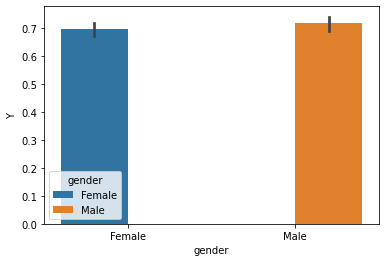

In [70]:
sns.barplot(data=RestaurantLessThan20_coupon, x ='gender', y='Y', hue='gender')

In [71]:
RestaurantLessThan20_coupon_only_accepted=RestaurantLessThan20_coupon[RestaurantLessThan20_coupon['Y']==1]
RestaurantLessThan20_coupon_only_accepted.shape[0]

1970

Text(0.5, 1.0, 'accpeted coupons by RestaurantLessThan20')

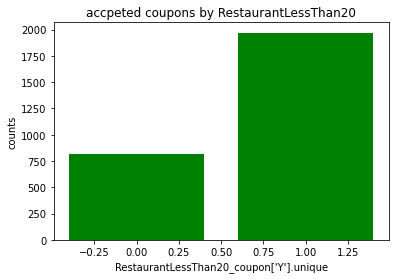

In [72]:
plt.bar(RestaurantLessThan20_coupon['Y'].unique(),RestaurantLessThan20_coupon['Y'].value_counts(), color='green')
plt.xlabel("RestaurantLessThan20_coupon['Y'].unique")
plt.ylabel('counts')
plt.title('accpeted coupons by RestaurantLessThan20')

Summary: From the total number of RestaurantLessThan20 coupons (2786), 1970 where accepted. 

In [73]:
# toCoupon_GEQ5min a 5 min is affected or not
RestaurantLessThan20_coupon['toCoupon_GEQ25min'].unique()
RestaurantLessThan20_coupon['toCoupon_GEQ25min'].value_counts()

0    2476
1     310
Name: toCoupon_GEQ25min, dtype: int64

In [74]:
px.bar(x=RestaurantLessThan20_coupon['toCoupon_GEQ25min'].unique(),y=RestaurantLessThan20_coupon['toCoupon_GEQ25min'].value_counts())

In [75]:
#weather affected or not
RestaurantLessThan20_coupon['weather'].unique()
RestaurantLessThan20_coupon['weather'].value_counts()

Sunny    2240
Snowy     376
Rainy     170
Name: weather, dtype: int64

In [76]:
RestaurantLessThan20_weather_sunny=RestaurantLessThan20_coupon[RestaurantLessThan20_coupon['weather']=='Sunny']
RestaurantLessThan20_weather_sunny_accepted=RestaurantLessThan20_weather_sunny[RestaurantLessThan20_weather_sunny['Y']==1]
RestaurantLessThan20_weather_sunny_accepted


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,0,0,0,1,1
12649,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Male,31,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,less1,never,4~8,gt8,less1,1,1,0,0,1,1
12662,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1


A 2240 RestaurantLessThan20 coupons where sent during the sunny time. From the total  1721 where accepted.